# **Recommendation System - Movies**

* **Nama:** Firda Humaira
* **Email:** firdahumaira13@gmail.com
* **ID Dicoding:** firdahum

# **Project Overview**

Meningkatnya jumlah penonton bioskop sejalan dengan bertambahnya jumlah film yang diproduksi setiap tahunnya. Beragam film dengan berbagai alur cerita, genre, dan tema, baik dari industri perfilman luar negeri maupun dalam negeri, memenuhi pasar. Kondisi ini membuat penonton sering kali kebingungan dalam memilih film yang ingin ditonton, sehingga menghabiskan waktu cukup lama untuk mencari film yang sesuai. Beberapa orang mengandalkan fitur pencarian film dari berbagai situs sebagai referensi sebelum memutuskan film yang akan ditonton. Karena setiap individu memiliki preferensi yang berbeda, mereka cenderung tertarik pada film yang mirip dengan yang mereka sukai. Untuk membantu dalam hal ini, sistem rekomendasi menjadi salah satu solusi yang efektif.

Sistem rekomendasi film dapat dibuat dengan metode **content-based filtering**, yang berfokus pada kemiripan antar konten film. Dalam pendekatan ini, informasi seperti genre, kata kunci (keywords), dan sinopsis (overview) digunakan untuk mewakili setiap film dalam bentuk data tekstual. Data ini kemudian diolah menggunakan teknik TF-IDF (Term Frequency–Inverse Document Frequency) untuk mengekstraksi bobot pentingnya kata-kata dalam tiap film, dan selanjutnya tingkat kemiripan antar film dihitung menggunakan cosine similarity.

# **1. Business Understanding**

## **1.1 Problem Statements**

1. Bagaimana pengguna dapat menemukan film yang mirip dengan film favorit mereka berdasarkan isi/konten film?

2.  Apakah informasi tambahan seperti perusahaan produksi dapat digunakan untuk lebih memahami kesamaan antar film?

3. Apakah informasi berupa keywords dan overview, tanpa melibatkan genre, dapat menghasilkan perhitungan cosine similarity yang lebih akurat dalam merekomendasikan film?

## **1.2 Goals**
1. Membantu pengguna menemukan film serupa berdasarkan kesamaan konten film, bukan hanya genre atau rating.

2. Menilai apakah informasi tambahan (seperti production company) berkontribusi terhadap penentuan kesamaan film.

3. Menguji apakah hanya menggunakan keywords dan overview (tanpa genre) bisa menghasilkan rekomendasi yang lebih relevan.

## **1.3 Solution Approach**
1. Gunakan content-based filtering dengan representasi teks (genre_list, keyword, dan overview) menggunakan TF-IDF dan cosine similarity untuk menemukan film yang mirip.
2. Tambahkan fitur seperti production company ke dalam model dan uji kontribusinya terhadap peningkatan kualitas rekomendasi.

3. Bandingkan hasil cosine similarity dari model yang hanya menggunakan keywords dan overview dengan model yang juga menyertakan genre untuk mengevaluasi akurasi rekomendasi.

# **2. Data Understanding**

## **2.1 Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## **2.2 Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

| **Variabel**         | **Deskripsi**                                                                                       |
| ---------------------- | --------------------------------------------------------------------------------------------------- |
| `budget`               | Anggaran produksi film (dalam USD)                                                                  |
| `genres`               | Daftar genre film (misalnya: Action, Comedy), dalam format JSON                                     |
| `homepage`             | URL website resmi film (jika ada)                                                                   |
| `id`                   | ID unik film dari TMDb                                                                              |
| `keywords`             | Kata kunci yang menggambarkan isi film, dalam format JSON                                           |
| `original_language`    | Bahasa asli film, menggunakan kode ISO 639-1. Contoh: `en` = Inggris, `fr` = Prancis, `ja` = Jepang |
| `original_title`       | Judul asli film (bisa berbeda dengan `title`)                                                       |
| `overview`             | Ringkasan atau sinopsis film                                                                        |
| `popularity`           | Skor popularitas film menurut TMDb (gabungan dari views, rating, dll)                               |
| `production_companies` | Daftar perusahaan produksi yang membuat film, dalam format JSON                                     |
| `release_date`         | Tanggal rilis film (format: YYYY-MM-DD)                                                             |
| `revenue`              | Pendapatan film secara global (dalam USD)                                                           |
| `runtime`              | Durasi film dalam menit                                                                             |
| `spoken_languages`     | Bahasa-bahasa yang digunakan dalam film, dalam format JSON                                          |
| `status`               | Status rilis film, misalnya: Released, Post Production, dll                                         |
| `tagline`              | Slogan atau tagline promosi film                                                                    |
| `title`                | Judul film (nama yang ditampilkan ke publik)                                                        |
| `vote_average`         | Rata-rata rating film dari pengguna (skala 1–10)                                                    |
| `vote_count`           | Jumlah total suara/rating yang diberikan pengguna                                                   |


In [ ]:
df.shape

(4803, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Insight:**
1. Sumber dataset yang saya gunakan : [TMDB 5000 movies](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/input?select=tmdb_5000_movies.csv)
2. Dataset ini terdiri dari 4803 baris dan 20 kolom
3. Dataset ini terdiri dari 3 tipe data, yaitu: object, float64, dan int64
4. Terdapat Missing Values di variabel **homepage, release_date, runtime, overview dan tagline**

In [ ]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

**Insight:**
1. Banyak Nilai 0 yang Tidak Masuk Akal

| Kolom     | Masalah                                                         |
| --------- | --------------------------------------------------------------- |
| `budget`  | Min = 0 → banyak film tidak mencantumkan anggaran               |
| `revenue` | Min = 0 → banyak film tidak mencantumkan pendapatan             |
| `runtime` | Min = 0 → ada film yang tidak punya durasi (data error/missing) |

2. Data Sangat Tidak Merata (Skewed)
   - budget, revenue, dan vote_count menunjukkan perbedaan ekstrem antara nilai minimum dan maksimum.

3. Rata-rata Durasi & Rating Film

| Kolom          | Nilai Rata-rata                                          |
| -------------- | -------------------------------------------------------- |
| `runtime`      | \~107 menit (sekitar 1 jam 47 menit)                     |
| `vote_average` | \~6.1 dari 10                                            |
| `popularity`   | Skor rata-rata \~21, tapi sangat bervariasi (maks = 875) |

  - noted: Durasi film sebagian besar normal. Rating rata-rata cenderung di angka 6–7, artinya sebagian besar film "cukup baik".


## **2.3 Exploratory Data Analysis**

### **2.3.1 Mengetahui jumlah missing values, data duplicate dan outlier**

In [ ]:
df.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


**insight:**

Terdapat missing values di dataset ini. Kemungkinan akan saya hapus karena tidak terpakai saat modeling

In [ ]:
df.duplicated().sum()

np.int64(0)

**insight:**

Tidak terdapat duplikasi data di dataset ini.

In [ ]:
#Cek data outlier
numeric = ['budget', 'revenue', 'runtime', 'vote_average', 'popularity', 'vote_count']
column = df [numeric]

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[~((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))).any(axis=1)]

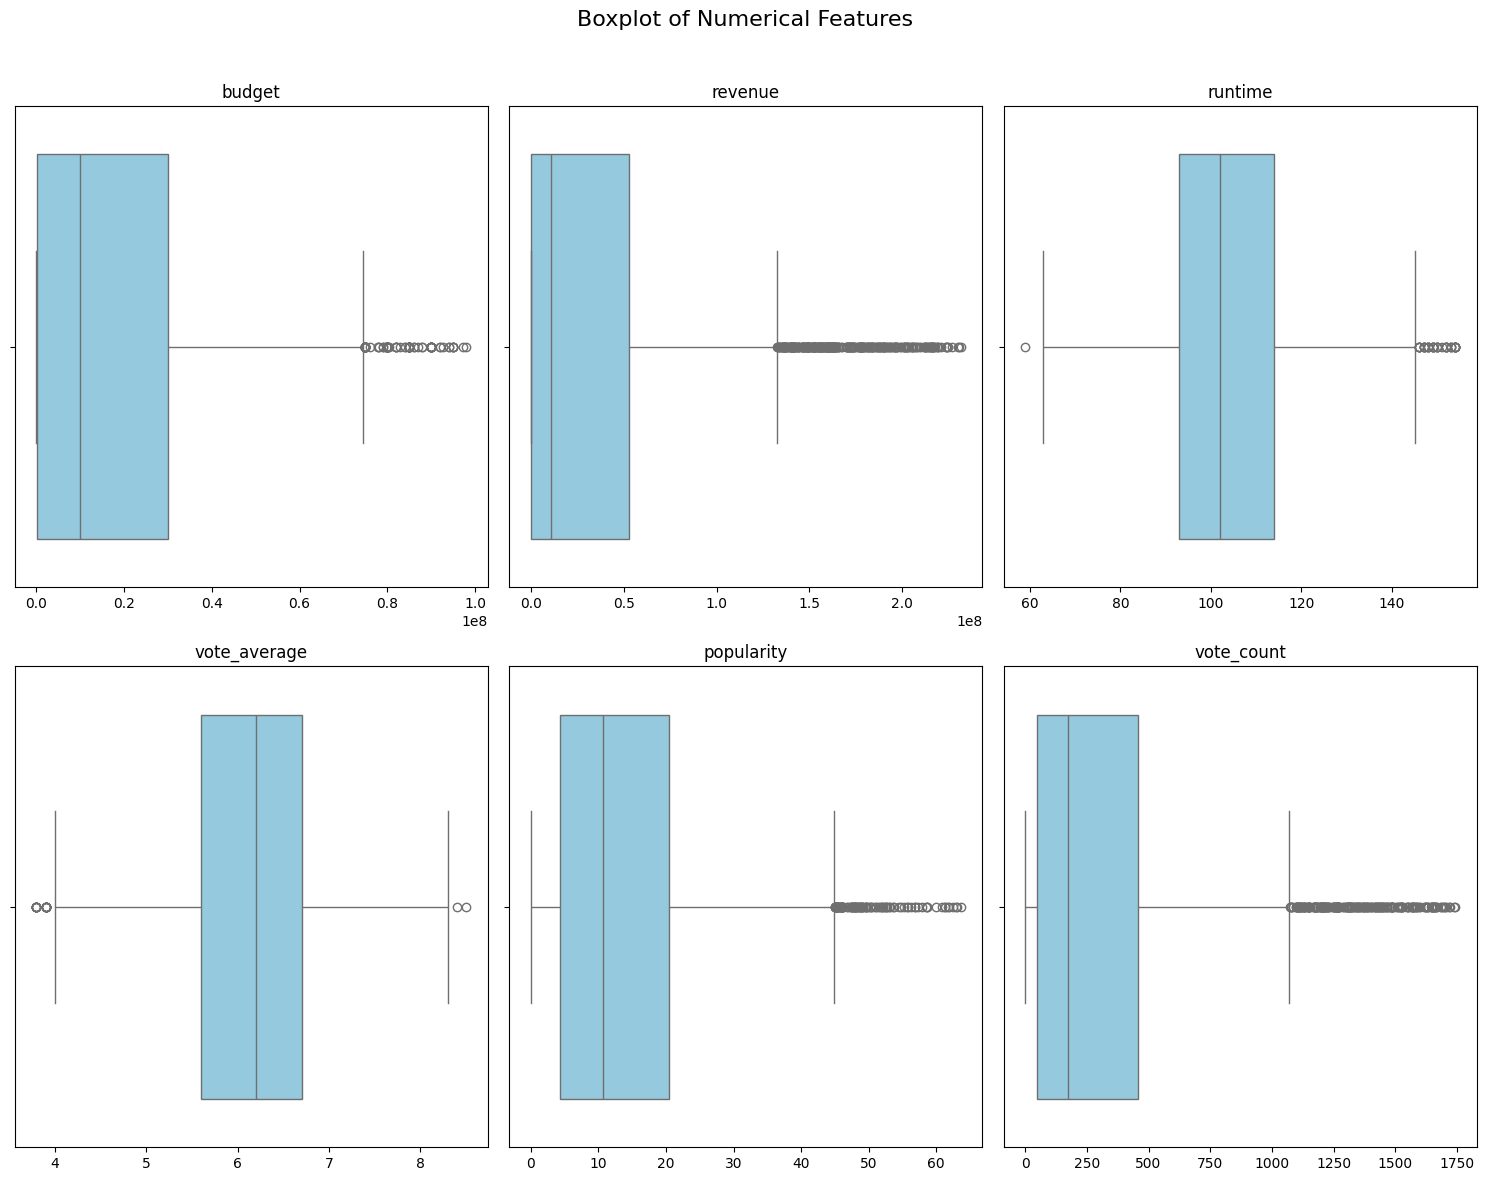

In [ ]:
# Buat grid 3x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Loop fitur dan plot
for i, feature in enumerate(column):
    sns.boxplot(data=df_filtered, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot yang tidak dipakai (jika jumlah fitur < jumlah grid)
for j in range(len(column), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Agar tidak ketimpa judul
plt.show()

**Insight:**
- Terdapat banyak outlier di sebagian besar fitur (kecuali vote_average dan sebagian runtime).

- Fitur-fitur seperti budget, revenue, popularity, dan vote_count menunjukkan bahwa industri film sangat tidak seimbang: hanya sebagian kecil film yang sangat sukses secara komersial atau populer.

In [ ]:
numeric = ['budget', 'revenue', 'runtime', 'vote_average',
           'popularity', 'vote_count']
categoric = ['original_language', 'status', 'genres',
             'keywords', 'production_companies', 'production_countries',
             'spoken_languages']

- Yang tidak dimasukkan ke numeric atau categoric :
  - **id**
  - **title**
  - **original_title**
  - **tagline**
  - **homepage**
  - **overview**
  - **release_date**
  

  | **Kolom**        | **Tipe Data**    | **Alasan Tidak Termasuk**                                                                                                                                    |
| ---------------- | ---------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `id`             | Integer          | Merupakan **ID unik** film, tidak punya makna statistik atau kategorikal. Tidak digunakan untuk analisis atau pemodelan.                                     |
| `title`          | String           | **Judul film**, bersifat unik per film. Tidak berguna sebagai fitur numerik/kategorikal.                                                                     |
| `original_title` | String           | Sama seperti `title`, bersifat unik dan bukan fitur yang representatif secara statistik.                                                                     |
| `homepage`       | String (URL)     | Merupakan **link URL resmi** film. Unik per film, tidak bermakna untuk pemodelan atau analisis.                                                              |
| `tagline`        | String           | Kalimat promosi (slogan), bersifat unik atau kosong. Jarang berguna langsung dalam analisis kategorikal atau numerik.                                        |
| `overview`       | String (teks)    | Deskripsi panjang (text bebas). Tidak termasuk `categoric` karena bukan kategori diskrit, dan tidak bisa diukur seperti `numeric`. Bisa digunakan untuk NLP. |
| `release_date`   | String (tanggal) | Format tanggal (`YYYY-MM-DD`), bukan numerik secara langsung, dan bukan kategorikal. Perlu diubah dulu (misalnya jadi tahun atau bulan) untuk digunakan.     |


### **2.3.2 Distribusi Kolom Numerik**

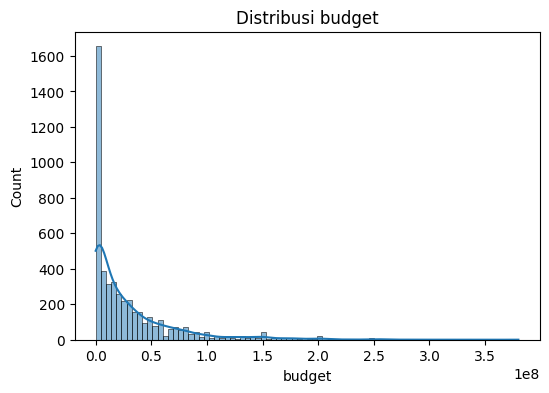

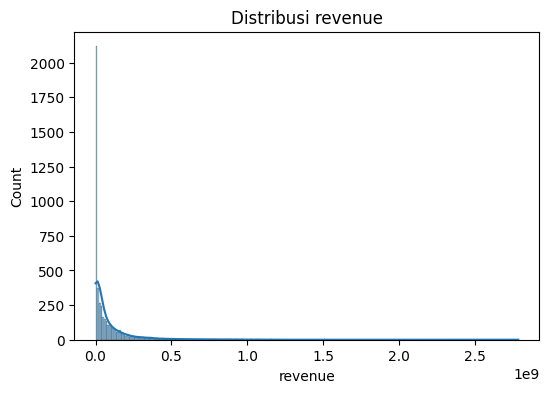

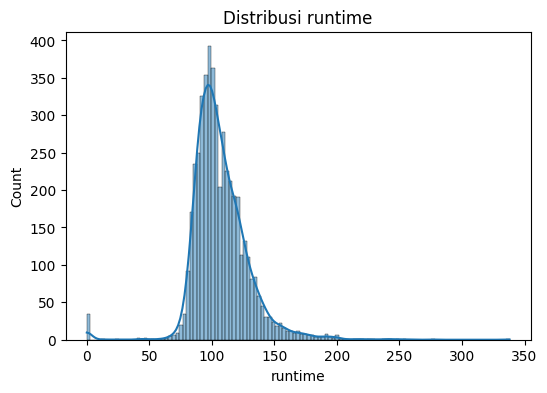

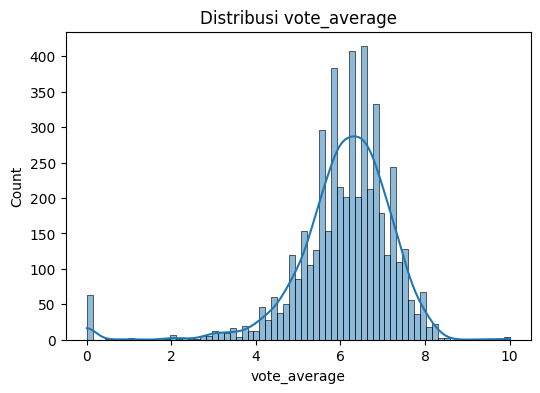

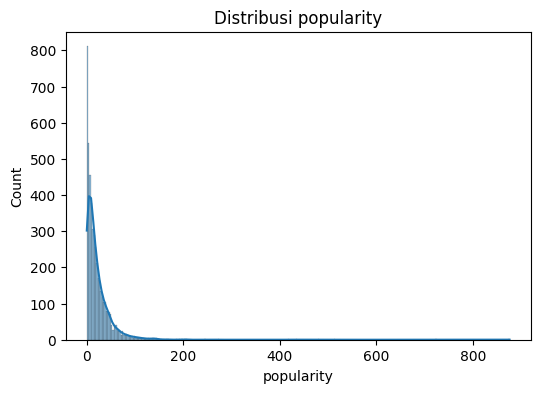

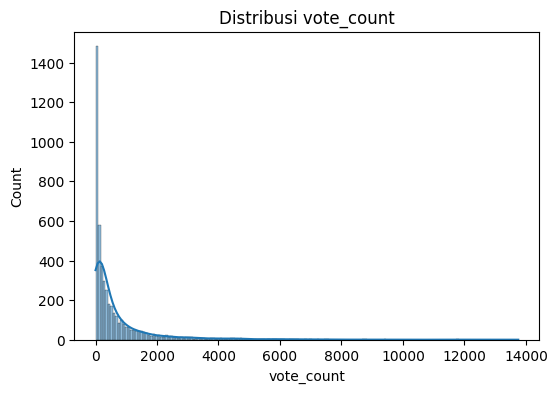

In [ ]:
for col in numeric:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

**Insight:**

- Budget & Revenue: Distribusinya sangat miring ke kanan; sebagian besar film punya nilai kecil, hanya sedikit yang sangat besar.

- Runtime: Distribusi mendekati normal, mayoritas film berdurasi sekitar 100 menit.

- Vote Average: Simetris, sebagian besar film punya rating sekitar 6–7.

- Popularity & Vote Count: Sama seperti budget dan revenue, miring ke kanan; hanya sebagian kecil film yang sangat populer dan banyak mendapat suara.

kesimpulan

Sebagian besar film dalam dataset memiliki karakteristik yang cukup umum—runtime sekitar 100 menit, rating rata-rata, serta nilai popularitas, budget, dan pendapatan yang relatif rendah. Hanya sebagian kecil film yang tergolong sangat sukses atau populer, terlihat dari adanya outlier pada distribusi budget, revenue, popularity, dan vote count. Pola ini menggambarkan bahwa industri film didominasi oleh beberapa blockbuster saja, sedangkan mayoritas film beroperasi pada skala yang lebih kecil.


### **2.3.3 Korelasi Antar Kolom Numerik**

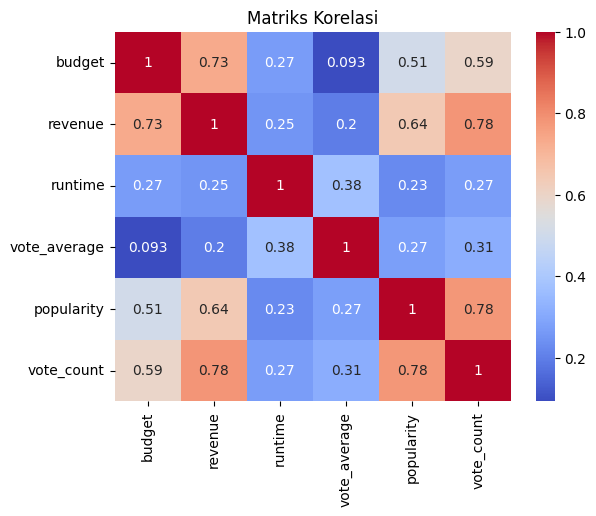

In [ ]:
sns.heatmap(df[numeric].corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

**Insight:**

1. vote_count punya korelasi kuat dengan
    - revenue (0.78) → film yang banyak diberi suara (vote) cenderung menghasilkan pendapatan lebih tinggi.
    - popularity (0.78) → film yang populer cenderung lebih banyak diberi rating.
    - budget (0.59) → film dengan anggaran lebih besar umumnya juga mendapat lebih banyak vote.

2. budget dan revenue sangat berkorelasi (0.73)
    - Semakin besar anggaran produksi, cenderung semakin besar pendapatannya.

3. vote_average (rating rata-rata) tidak berkorelasi tinggi dengan apapun
    - Korelasi tertinggi hanya dengan runtime (0.38) dan vote_count (0.31) → artinya film yang panjang dan banyak di-vote sedikit lebih cenderung dapat rating bagus, tapi tidak signifikan.

4. runtime korelasinya lemah ke semua variabel:
    - Film berdurasi panjang tidak menjamin revenue, popularitas, atau rating tinggi.

### **2.3.4 Rata-rata rating per genre**

Karena genres berupa JSON string, perlu di-parse dulu:

In [ ]:
def extract_genres(g):
    try:
        genres = ast.literal_eval(g)
        return [item['name'] for item in genres]
    except:
        return []

df['genre_list'] = df['genres'].apply(extract_genres)

Lalu eksplor:

In [ ]:
from collections import Counter

genre_flat = [genre for sublist in df['genre_list'] for genre in sublist]
Counter(genre_flat).most_common(10)

[('Drama', 2297),
 ('Comedy', 1722),
 ('Thriller', 1274),
 ('Action', 1154),
 ('Romance', 894),
 ('Adventure', 790),
 ('Crime', 696),
 ('Science Fiction', 535),
 ('Horror', 519),
 ('Family', 513)]

In [ ]:
genre_rating = {}

for genre in genre_flat:
    mask = df['genre_list'].apply(lambda x: genre in x)
    genre_rating[genre] = df[mask]['vote_average'].mean()

pd.Series(genre_rating, name='rata-rata').sort_values(ascending=False).head(10)

,rata-rata
History,6.719797
War,6.713889
Drama,6.388594
Music,6.355676
Foreign,6.352941
Animation,6.341453
Crime,6.274138
Documentary,6.238182
Romance,6.207718
Mystery,6.183908


<ipython-input-75-7a22fa4554bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_rating_df.head(10), x='rata-rata', y='genre', palette='viridis')


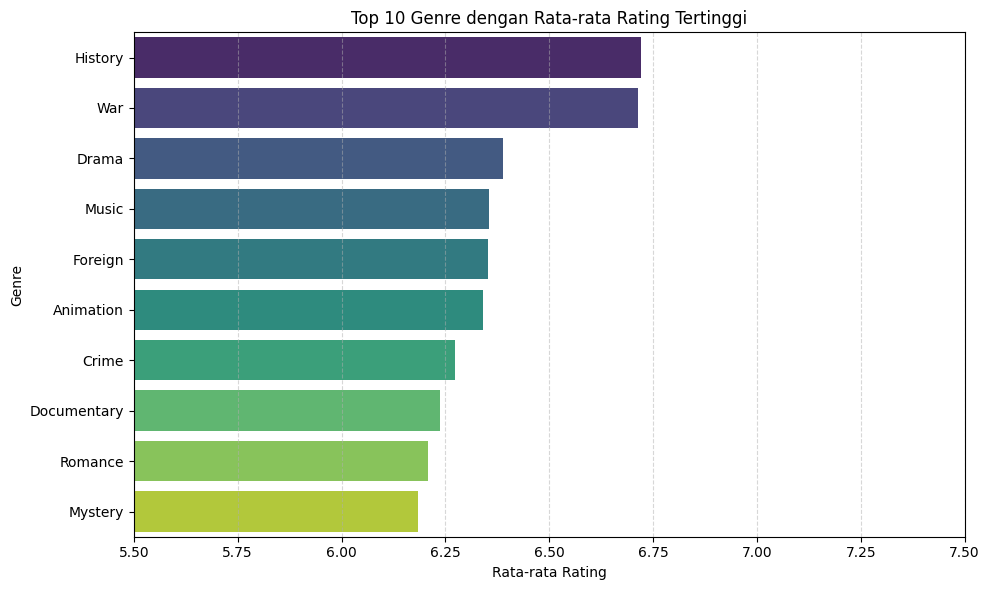

In [ ]:
# Ubah genre_rating jadi DataFrame
genre_rating_df = pd.Series(genre_rating, name='rata-rata').sort_values(ascending=False).reset_index()
genre_rating_df.rename(columns={'index': 'genre'}, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=genre_rating_df.head(10), x='rata-rata', y='genre', palette='viridis')

plt.title('Top 10 Genre dengan Rata-rata Rating Tertinggi')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Genre')
plt.xlim(5.5, 7.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Genre memengaruhi kualitas persepsi film dari sisi penonton.
- Genre dengan tema berat dan emosional (History, War, Drama) cenderung dinilai lebih tinggi.
- Wawasan ini bisa membantu sistem rekomendasi memprioritaskan genre tertentu untuk pengguna dengan preferensi tinggi terhadap rating.

# **3. Data Preparation**

## **3.1 Data Cleaning**

### **3.1.1 Format Tidak Konsisten / JSON dalam String**

Melakukan penanganan terhadap format yang tidak konsisten atau JSON dalam string itu penting karena beberapa alasan krusial dalam proses pengolahan data.
Alasan:
1. Parsing dan Ekstraksi Data Gagal:
  - Banyak kolom (misalnya genres, keywords, production_companies) disimpan dalam format string yang terlihat seperti JSON (misalnya: "[{'id': 28, 'name': 'Action'}]"). Jika tidak dikonversi ke struktur Python (seperti list atau dict), kita tidak bisa mengakses nilai-nilainya secara efektif.

2. Analisis Terhambat:
  - Jika struktur data tidak dibersihkan, kita tidak bisa menghitung jumlah genre, menghitung berapa film mengandung genre "Action", atau melakukan agregasi berdasarkan kategori tertentu.

3. Inconsistent Format = Error Saat Modeling:
  - Format yang tidak konsisten (misal kadang pakai kutip tunggal ', kadang kutip ganda ", atau bahkan format tidak lengkap) bisa menyebabkan error saat parsing, yang berdampak pada pipeline analisis atau training model machine learning.

In [ ]:
def extract_names(text):
    try:
        items = ast.literal_eval(text)
        return [item['name'] for item in items]
    except:
        return []

# Kolom-kolom yang perlu diproses
json_cols = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']

# Terapkan ke setiap kolom
for col in json_cols:
    df[col] = df[col].apply(extract_names)

# lihat hasilnya
print(df[json_cols].head(3))

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   

                                production_companies  \
0  [Ingenious Film Partners, Twentieth Century Fo...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...   
2                   [Columbia Pictures, Danjaq, B24]   

                         production_countries  \
0  [United States of America, United Kingdom]   
1                  [United States of America]   
2  [United Kingdom, United States of America]   

                                  spoken_languages  
0                               [English, Español]  
1                                     

### **3.1.2 Menghapus kolom yang tidak relevan untuk Sistem Rekomendasi (Content-based Filtering)**

Content-Based Filtering adalah metode sistem rekomendasi yang memberikan saran berdasarkan kemiripan konten antar item (dalam hal ini, film).
Artinya, sistem ini melihat fitur-fitur yang menjelaskan isi atau karakteristik film, seperti:

- overview (sinopsis)

- genres (genre film)

- keywords (kata kunci)

jadi, saya akan menghapus variabel yang tidak relevan

In [ ]:
columns_to_drop = ['id', 'homepage', 'tagline', 'original_title',
                   'release_date', 'status', 'vote_count', 'vote_average',
                   'popularity', 'budget', 'runtime', 'genres', 'original_language',
                   'revenue', 'spoken_languages','production_countries']

# Hapus kolom dari DataFrame
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['keywords', 'overview', 'production_companies', 'title', 'genre_list'], dtype='object')

In [ ]:
df.head()

,keywords,overview,production_companies,title,genre_list
0,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Ingenious Film Partners, Twentieth Century Fo...",Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Walt Disney Pictures, Jerry Bruckheimer Films...",Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Columbia Pictures, Danjaq, B24]",Spectre,"[Action, Adventure, Crime]"
3,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Legendary Pictures, Warner Bros., DC Entertai...",The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",[Walt Disney Pictures],John Carter,"[Action, Adventure, Science Fiction]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   keywords              4803 non-null   object
 1   overview              4800 non-null   object
 2   production_companies  4803 non-null   object
 3   title                 4803 non-null   object
 4   genre_list            4803 non-null   object
dtypes: object(5)
memory usage: 187.7+ KB


**Insight:**

Masih terdapat missing values di kolom 'overview'

### **3.1.3 Menangani Missing Values**

In [ ]:
df = df.dropna(subset=['overview'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   keywords              4800 non-null   object
 1   overview              4800 non-null   object
 2   production_companies  4800 non-null   object
 3   title                 4800 non-null   object
 4   genre_list            4800 non-null   object
dtypes: object(5)
memory usage: 225.0+ KB


**Insight:**

Missing values sudah tidak ada

# **4. Modeling and Result**

## **4.1 Model Development dengan Content Based Features**

### **TF-IDF**

Pada proyek saya ini perlu menggunakan TF-IDF (Term Frequency - Inverse Document Frequency) karena metode ini sangat efektif dalam mengolah data teks untuk sistem rekomendasi berbasis konten (content-based filtering)

TF-IDF digunakan karena bisa mengekstrak makna penting dari teks, mengabaikan kata tidak penting, dan mengubah teks menjadi format numerik yang siap untuk menghitung kemiripan antar item.

In [ ]:
# Gabungkan fitur teks
df['combined_features'] = (df['overview'] + ' ' +
                           df['keywords'].apply(lambda x: ' '.join(x)) + ' ' +
                           df['genre_list'].apply(lambda x: ' '.join(x)))

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])


<ipython-input-86-63b28aa3e5cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_features'] = (df['overview'] + ' ' +


**Insight:**

Tahap penggabungan fitur teks (`combined_feature`) sangat penting dalam proses TF-IDF karena memungkinkan berbagai sumber informasi teks seperti overview, keywords, dan genre_list disatukan ke dalam satu kolom. TF-IDF hanya dapat bekerja pada satu kolom teks, sehingga penyatuan ini diperlukan agar semua informasi penting bisa diproses bersama. Dengan menggabungkan fitur-fitur tersebut, representasi teks menjadi lebih kaya dan kontekstual. Misalnya, overview memberikan gambaran alur cerita, keywords mencerminkan tema atau topik spesifik, dan genre_list menambahkan klasifikasi film. Kombinasi ini membantu TF-IDF menghitung bobot kata secara lebih akurat. Selain itu, vektor teks yang lebih lengkap meningkatkan akurasi perhitungan cosine similarity, sehingga menghasilkan rekomendasi film yang lebih relevan. Penggabungan ini juga mencegah kehilangan informasi penting yang mungkin terjadi jika hanya satu fitur saja yang digunakan dalam analisis.

### **Cosine Similarity**

In [ ]:
# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.02124748, 0.00806968, ..., 0.00789816, 0.00372134,
        0.        ],
       [0.02124748, 1.        , 0.00965902, ..., 0.01672038, 0.        ,
        0.        ],
       [0.00806968, 0.00965902, 1.        , ..., 0.01058042, 0.        ,
        0.        ],
       ...,
       [0.00789816, 0.01672038, 0.01058042, ..., 1.        , 0.01822043,
        0.02112587],
       [0.00372134, 0.        , 0.        , ..., 0.01822043, 1.        ,
        0.01061587],
       [0.        , 0.        , 0.        , ..., 0.02112587, 0.01061587,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix
cosine_sim_df.sample(5, axis=1).sample(20, axis=0)

Shape: (4800, 4800)


title,2016: Obama's America,Bad Words,Sands of Iwo Jima,The Exorcist,Hanna
title,,,,,
Homefront,0.018509,0.028901,0.021483,0.053116,0.035485
London Has Fallen,0.004365,0.013217,0.011792,0.004202,0.011994
Witless Protection,0.000000,0.002443,0.009885,0.000000,0.012052
Nerve,0.001846,0.017377,0.000000,0.010165,0.003980
Blindness,0.008792,0.000000,0.013695,0.010061,0.004080
Charlie and the Chocolate Factory,0.019366,0.019577,0.022791,0.015572,0.014623
Hot Rod,0.000000,0.013521,0.005676,0.004426,0.009109
The Score,0.000000,0.000000,0.008689,0.003096,0.008837
The Words,0.034669,0.003408,0.001590,0.003333,0.002967


**Insight:**

Cosine similarity matrix memungkinkan kita mengukur dan membandingkan kemiripan antar film secara numerik. Dari sampel data yang ditampilkan, tampak bahwa sebagian besar film memiliki kesamaan yang rendah satu sama lain, menandakan keberagaman tema dan genre. Namun, ada juga beberapa pasangan film dengan kemiripan relatif tinggi, yang menunjukkan bahwa model berhasil menangkap hubungan semantik atau genre tertentu antar film. Matriks ini sangat berguna untuk sistem rekomendasi berbasis konten (content-based filtering), di mana film yang mirip dengan film tertentu bisa direkomendasikan kepada pengguna.

## **4.2 Penerapan**

In [ ]:
def recommend(title, cosine_sim):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]  # ambil top-5
    movie_indices = [i[0] for i in sim_scores]

    # Ambil skor similarity-nya juga
    similarity_scores = [score for _, score in sim_scores]

    print(f"Rekomendasi 5 film yang se tema dengan: '{title}'\n")

    # Ambil data film + tambahkan skor cosine similarity
    result = df[['title', 'genre_list', 'keywords', 'overview']].iloc[movie_indices].copy()
    result['cosine_score'] = similarity_scores

    return result

In [ ]:
df[df['title'] == 'Avatar'][['genre_list', 'keywords', 'overview']]

,genre_list,keywords,overview
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di..."


In [ ]:
title = 'Avatar'
recommend(title, cosine_sim=cosine_sim)

Rekomendasi 5 film yang se tema dengan: 'Avatar'



,title,genre_list,keywords,overview,cosine_score
373,Mission to Mars,[Science Fiction],"[mars, spacecraft, space travel, alien, long t...",When contact is lost with the crew of the firs...,0.304030
2403,Aliens,"[Horror, Action, Thriller, Science Fiction]","[android, extraterrestrial technology, space m...",When Ripley's lifepod is found by a salvage cr...,0.286926
1531,Moonraker,"[Action, Adventure, Thriller, Science Fiction]","[venice, mass murder, space marine, space suit...",During the transportation of a Space Shuttle a...,0.280682
838,Alien³,"[Science Fiction, Action, Horror]","[prison, android, spacecraft, space marine, im...",After escaping with Newt and Hicks from the al...,0.275455
2015,Spaceballs,"[Comedy, Science Fiction]","[android, lasergun, swordplay, temple, space m...",When the nefarious Dark Helmet hatches a plan ...,0.255016


**Insight**:
1. Kesamaan Genre

    - Hampir semua film yang direkomendasikan memiliki genre Science Fiction dan beberapa juga memiliki unsur Action dan Thriller, sama seperti Avatar.

    - Ini menunjukkan bahwa sistem berhasil menangkap kesamaan genre utama dari Avatar dengan film lain.

2. Kemiripan Kata Kunci & Tema Cerita:

    - Keyword seperti spacecraft, alien, space marine, android, extraterrestrial sangat mendekati dunia dan tema Avatar.

    - Banyak film juga mengambil latar luar angkasa atau eksplorasi luar dunia — cocok dengan dunia fiksi ilmiah imajinatif ala Avatar.

3. Variasi dan Relevansi Film:

    - Judul seperti Aliens, Moonraker, dan Mission to Mars memang berkutat di genre eksplorasi luar angkasa dan konflik antar spesies atau teknologi canggih.

    - Spaceballs muncul sebagai film dengan elemen sci-fi, namun bernuansa komedi parodi, yang bisa diperdebatkan relevansinya tergantung konteks pengguna.

In [ ]:
df[df['title'] == 'Tangled'][['genre_list', 'keywords', 'overview']]

,genre_list,keywords,overview
6,"[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...",When the kingdom's most wanted-and most charmi...


In [ ]:
title = 'Tangled'
recommend(title, cosine_sim=cosine_sim)

Rekomendasi 5 film yang se tema dengan: 'Tangled'



,title,genre_list,keywords,overview,cosine_score
917,Into the Woods,"[Fantasy, Comedy, Music]","[witch, cinderella, prince, fairy tale, musica...",In a woods filled with magic and fairy tale ch...,0.150716
2309,Out of Inferno,[Action],[],"On the hottest day in 50 years, a serious fire...",0.131454
391,Enchanted,"[Comedy, Family, Fantasy, Romance]","[poison, queen, fairy tale, musical, princess,...",The beautiful princess Giselle is banished by ...,0.126511
1423,Ella Enchanted,"[Family, Fantasy, Comedy]","[elves, based on novel, magic, fairy, prince, ...",Ella lives in a magical world in which each ch...,0.120992
565,Shrek 2,"[Adventure, Animation, Comedy, Family, Fantasy]","[prison, magic, liberation, honeymoon, parents...","Shrek, Fiona and Donkey set off to Far, Far Aw...",0.117521


**Insight:**
1. Genre yang Serupa

    - Film yang direkomendasikan mayoritas memiliki genre Fantasy, Family, Comedy, dan bahkan ada yang Animation seperti Shrek 2.

    - Ini menunjukkan bahwa sistem rekomendasi berhasil mengidentifikasi genre utama dari Tangled dan mencari film dengan genre sejenis.

2. Kemiripan Tema/Kata Kunci

    - Film seperti Ella Enchanted dan Enchanted memiliki keyword seperti "magic", "fairy tale", dan "princess" — sangat relevan dengan karakteristik Tangled.

    - Hal ini menunjukkan bahwa metode TF-IDF + Cosine Similarity cukup efektif menangkap konteks kata dan tema cerita.

3. Kualitas Hasil Rekomendasi

    - Judul seperti Into the Woods dan Enchanted memang punya kesamaan dunia fantasi dan musikal, cocok untuk penonton Tangled.

    - Namun ada juga judul seperti Out of Inferno (dengan genre Action) yang kurang relevan. Ini mungkin terjadi karena keterbatasan informasi pada fitur teks, atau karena elemen umum seperti "heroism" atau "rescue" membuatnya dianggap mirip.

In [ ]:
df[df['title'] == 'Inception'][['genre_list', 'keywords', 'overview']]

,genre_list,keywords,overview
96,"[Action, Thriller, Science Fiction, Mystery, A...","[loss of lover, dream, kidnapping, sleep, subc...","Cobb, a skilled thief who commits corporate es..."


In [ ]:
title = 'Inception'
recommend(title, cosine_sim=cosine_sim)

Rekomendasi 5 film yang se tema dengan: 'Inception'



,title,genre_list,keywords,overview,cosine_score
2897,Cypher,"[Thriller, Science Fiction, Mystery]","[double life, undercover, lie, wife, company, ...","An unsuspecting, disenchanted man finds himsel...",0.123394
4401,The Helix... Loaded,"[Action, Comedy, Science Fiction]",[],,0.116030
1803,Blood and Wine,"[Crime, Drama, Thriller]","[robbery, gun, fight, love, murder, heist, the...",A man who has failed as a father and husband c...,0.106518
1267,Duplex,"[Action, Comedy, Thriller]",[],"When a young couple buys their dream home, the...",0.104543
2515,"Crouching Tiger, Hidden Dragon","[Adventure, Drama, Action, Romance]","[flying, martial arts, taskmaster, comb, tiger...",Two warriors in pursuit of a stolen sword and ...,0.088025


**Insight:**

1. Nilai cosine score relatif rendah (maks ~0.12)
  - Ini menandakan bahwa tidak ada film yang sangat mirip secara konten dengan Inception dalam dataset ini. Namun, beberapa film memiliki cukup banyak elemen serupa untuk dijadikan rekomendasi.

2. Kemiripan berdasarkan genre dan tema kompleks
  - Film seperti Cypher dan Blood and Wine memiliki genre seperti Thriller, Science Fiction, dan Drama, yang juga dimiliki oleh Inception. Ini menunjukkan bahwa model menekankan pada genre dan elemen cerita (misalnya: "undercover", "robbery", "double life", dll) dalam menentukan kemiripan.

3. Tidak semua film memiliki keywords yang lengkap
  - Misalnya, The Helix... Loaded dan Duplex tidak memiliki data keywords, namun tetap masuk rekomendasi karena overview dan genre masih relevan.

4. Beberapa rekomendasi tampak kurang relevan secara tematik
  - Misalnya, Crouching Tiger, Hidden Dragon lebih ke arah aksi dan seni bela diri, berbeda secara substansi dengan tema psikologis dan mimpi seperti di Inception. Ini bisa terjadi karena kemiripan kata dalam deskripsi atau genre overlap seperti Action dan Drama.

# **5. Evaluation**

Proyek ini bertujuan untuk melihat apakah rekomendasi film yang dihasilkan berdasarkan genre, keywords, dan overview mampu memberikan hasil yang akurat dan relevan. Namun, karena dataset yang digunakan tidak menyediakan data interaksi eksplisit antara pengguna dan film (seperti rating, klik, atau histori tontonan), evaluasi sistem rekomendasi tidak dapat dilakukan secara kuantitatif menggunakan metrik standar seperti Precision@K, Recall@K, MAP, atau NDCG.

Sebagai gantinya, evaluasi dilakukan secara kualitatif, yaitu dengan menganalisis hasil rekomendasi yang dihasilkan oleh model berbasis konten. Model ini menggunakan representasi teks gabungan dari overview, keywords, dan genre_list yang diolah menggunakan TF-IDF, serta perhitungan cosine similarity untuk menentukan kemiripan antar film.

Beberapa film dipilih sebagai input, dan daftar film yang direkomendasikan diamati secara manual. Penilaian dilakukan berdasarkan relevansi isi, kesamaan tema, genre, dan topik. Hasilnya menunjukkan bahwa model mampu merekomendasikan film-film yang secara konteks cukup serupa dengan film acuan, terutama jika teks pada overview, keywords, dan genre_list kaya dan deskriptif.

Catatan: TF-IDF dan cosine similarity digunakan sebagai metode perhitungan kemiripan konten, bukan sebagai metrik evaluasi performa sistem. (Kesalahan saya sebelumnya)

# **Solving the Problems**

### **1. Bagaimana pengguna dapat menemukan film yang mirip dengan film favorit mereka berdasarkan isi/konten film?**

In [ ]:
def recommend(title, cosine_sim):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    print(f"Rekomendasi 10 Film yang mirip berdasarkan konten dengan: '{title}'\n")

    result = df[['title', 'genre_list', 'keywords', 'overview']].iloc[movie_indices].copy()
    result['cosine_score'] = similarity_scores

    return result

In [ ]:
recommend('Jurassic World', cosine_sim)

Rekomendasi 10 Film yang mirip berdasarkan konten dengan: 'Jurassic World'



,title,genre_list,keywords,overview,cosine_score
675,Jurassic Park,"[Adventure, Science Fiction]","[exotic island, dna, paleontology, tyrannosaur...",A wealthy entrepreneur secretly creates a them...,0.549255
508,The Lost World: Jurassic Park,"[Adventure, Action, Science Fiction]","[exotic island, dna, paleontology, tyrannosaur...",Four years after Jurassic Park's genetically b...,0.436224
334,Jurassic Park III,"[Adventure, Action, Thriller, Science Fiction]","[exotic island, dna, paleontology, tyrannosaur...","In need of funds for research, Dr. Alan Grant ...",0.307708
1536,Vacation,[Comedy],"[route 66, grand canyon, cow, vacation, road t...",Hoping to bring his family closer together and...,0.267268
2527,National Lampoon's Vacation,"[Comedy, Adventure, Romance]","[usa, relatives, family vacation, family holid...",Clark Griswold is on a quest to take his famil...,0.181616
1580,The Nut Job,"[Animation, Comedy, Family, Adventure]","[squirrel, 3d]","Surly, a curmudgeon, independent squirrel is b...",0.179690
3577,The Way Way Back,"[Comedy, Drama]","[shyness, beach, bicycle, conversation, friend...","Over the course of his summer break, a teenage...",0.176063
952,Beverly Hills Cop III,"[Action, Comedy, Crime]","[detective, undercover, security camera, carou...",Back in sunny southern California and on the t...,0.161603
4669,"The Beast from 20,000 Fathoms","[Adventure, Horror, Science Fiction]","[monster, atomic bomb, lighthouse, arctic, ram...","The Beast from 20,000 Fathoms is a 1953 scienc...",0.158528
3139,Adventureland,[Comedy],"[comedy, cheating on partner, amusement park, ...","In the summer of 1987, a college graduate take...",0.158471


**Intepretasi**

Berdasarkan gambar rekomendasi film yang mirip dengan Jurassic World, dapat disimpulkan bahwa sistem rekomendasi berbasis konten mampu memberikan hasil yang sangat relevan pada urutan teratas, terutama ketika film-film tersebut berasal dari waralaba atau franchise yang sama, seperti Jurassic Park, The Lost World, dan Jurassic Park III. Ketiga film ini memiliki skor kemiripan yang tinggi karena kesamaan yang kuat dalam genre, kata kunci, dan alur cerita.

Namun, setelah tiga besar, kualitas rekomendasi mulai menurun secara signifikan. Film-film seperti Vacation, The Nut Job, hingga Adventureland yang muncul selanjutnya memiliki tema, genre, dan konten yang tidak lagi selaras dengan Jurassic World, meskipun secara teknis masih memiliki elemen umum seperti “adventure” atau “comedy”.

Penurunan skor cosine similarity yang drastis ini menunjukkan bahwa model memiliki keterbatasan dalam mempertahankan relevansi ketika fitur-fitur yang digunakan terlalu umum. Oleh karena itu, untuk meningkatkan akurasi terutama di luar film-film yang sangat mirip, perlu dipertimbangkan penambahan fitur yang lebih mendalam seperti karakter, setting, atau analisis sentimen dari ulasan pengguna.

### **2. Apakah informasi tambahan seperti perusahaan produksi dapat digunakan untuk lebih memahami kesamaan antar film?**



In [ ]:
# Gabungkan fitur-fitur konten
df['combined_features'] = df['genre_list'].astype(str) + ' ' + \
                          df['keywords'].astype(str) + ' ' + \
                          df['overview'].astype(str) + ' ' + \
                          df['production_companies'].astype(str)

# Vektorisasi teks gabungan
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Hitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi rekomendasi berdasarkan title
def recommend(title, cosine_sim=cosine_sim, df=df):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    cosine_scores = [i[1] for i in sim_scores]

    print(f"Rekomendasi 5 film mirip berdasarkan gabungan konten dengan: '{title}'\n")

    result = df[['title', 'genre_list', 'keywords', 'overview', 'production_companies']].iloc[movie_indices].copy()
    result['cosine_score'] = cosine_scores

    return result

<ipython-input-98-5ea4dbc34bed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_features'] = df['genre_list'].astype(str) + ' ' + \


In [ ]:
df[df['title'] == 'Tangled'][['genre_list', 'keywords', 'overview']]

,genre_list,keywords,overview
6,"[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...",When the kingdom's most wanted-and most charmi...


In [ ]:
recommend('Tangled', cosine_sim)

Rekomendasi 5 film mirip berdasarkan gabungan konten dengan: 'Tangled'



,title,genre_list,keywords,overview,production_companies,cosine_score
2114,Return to Never Land,"[Adventure, Fantasy, Animation, Family]",[animation],The classic tale of 'Peter Pan' continues in D...,"[Walt Disney Pictures, Walt Disney Television ...",0.232549
269,The Princess and the Frog,"[Romance, Family, Animation, Music]","[based on novel, voodoo, kiss, princess, anima...","A waitress, desperate to fulfill her dreams as...","[Walt Disney Pictures, Walt Disney Animation S...",0.195661
2116,The Jungle Book 2,"[Family, Animation, Adventure]","[river, musical, tiger, village, feral child, ...","Mowgli, missing the jungle and his old friends...","[Walt Disney Pictures, Walt Disney Television ...",0.169836
917,Into the Woods,"[Fantasy, Comedy, Music]","[witch, cinderella, prince, fairy tale, musica...",In a woods filled with magic and fairy tale ch...,"[Walt Disney Pictures, Marc Platt Productions,...",0.169143
812,Pocahontas,"[Adventure, Animation, Drama, Family]","[culture clash, settler, forbidden love, colon...",History comes gloriously to life in Disney's e...,"[Walt Disney Pictures, Walt Disney Feature Ani...",0.154821


In [ ]:
df[df['title'] == 'Avatar'][['genre_list', 'keywords', 'overview']]

,genre_list,keywords,overview
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di..."


In [ ]:
recommend('Avatar', cosine_sim)

Rekomendasi 5 film mirip berdasarkan gabungan konten dengan: 'Avatar'



,title,genre_list,keywords,overview,production_companies,cosine_score
2403,Aliens,"[Horror, Action, Thriller, Science Fiction]","[android, extraterrestrial technology, space m...",When Ripley's lifepod is found by a salvage cr...,"[Twentieth Century Fox Film Corporation, SLM P...",0.291800
838,Alien³,"[Science Fiction, Action, Horror]","[prison, android, spacecraft, space marine, im...",After escaping with Newt and Hicks from the al...,"[Twentieth Century Fox Film Corporation, Brand...",0.281523
373,Mission to Mars,[Science Fiction],"[mars, spacecraft, space travel, alien, long t...",When contact is lost with the crew of the firs...,"[Spyglass Entertainment, The Jacobson Company,...",0.270865
1531,Moonraker,"[Action, Adventure, Thriller, Science Fiction]","[venice, mass murder, space marine, space suit...",During the transportation of a Space Shuttle a...,"[United Artists, Eon Productions]",0.260957
3158,Alien,"[Horror, Action, Thriller, Science Fiction]","[android, countdown, space marine, space suit,...","During its return to the earth, commercial spa...","[Twentieth Century Fox Film Corporation, Brand...",0.255876


**Intepretasi:**

Menambahkan informasi production_companies dapat meningkatkan akurasi rekomendasi, tetapi tergantung konteks film.

| Kondisi Film                                                 | Dampak Penambahan `production_companies`                                                                                          |
| ------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| **Film dengan gaya khas studio** (misal: *Tangled* - Disney) | **Meningkatkan akurasi** karena banyak film dari studio tersebut punya tone, genre, dan target audiens yang mirip.              |
| **Film dengan genre kuat dan lebih umum** (misal: *Avatar*)  | **Peningkatan akurasi terbatas**, karena genre seperti sci-fi lebih ditentukan oleh cerita, visual, dan tema, bukan studionya. |


Penambahan **production_companies** dapat meningkatkan akurasi, terutama untuk film yang dipengaruhi kuat oleh gaya studio (misalnya animasi Disney). Namun, untuk film dengan kekuatan utama di alur cerita atau genre luas seperti sci-fi, pengaruhnya lebih kecil.


### **3. Apakah informasi berupa keywords dan overview, tanpa melibatkan genre, dapat menghasilkan perhitungan cosine similarity yang lebih akurat dalam merekomendasikan film?**

In [ ]:
# Gabungkan hanya keywords dan overview
df['content_features'] = df['keywords'].astype(str) + ' ' + df['overview'].astype(str)

# Vektorisasi TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content_features'])

# Hitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi rekomendasi
def recommend(title, cosine_sim=cosine_sim, df=df):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    cosine_scores = [i[1] for i in sim_scores]

    results = df[['title', 'keywords', 'overview']].iloc[movie_indices].copy()
    results['cosine_score'] = cosine_scores

    print(f"\nRekomendasi 5 film mirip berdasarkan keywords + overview (tanpa genre): '{title}'")
    return results

# Contoh penggunaan
recommend('Inception')

<ipython-input-103-fe666e7bef25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_features'] = df['keywords'].astype(str) + ' ' + df['overview'].astype(str)



Rekomendasi 5 film mirip berdasarkan keywords + overview (tanpa genre): 'Inception'


,title,keywords,overview,cosine_score
1803,Blood and Wine,"[robbery, gun, fight, love, murder, heist, the...",A man who has failed as a father and husband c...,0.104511
2897,Cypher,"[double life, undercover, lie, wife, company, ...","An unsuspecting, disenchanted man finds himsel...",0.104504
1267,Duplex,[],"When a young couple buys their dream home, the...",0.093881
2515,"Crouching Tiger, Hidden Dragon","[flying, martial arts, taskmaster, comb, tiger...",Two warriors in pursuit of a stolen sword and ...,0.080300
1683,Pitch Perfect 2,"[music, sequel, singer, male female relationsh...","The Bellas are back, and they are better than ...",0.079102


**Intepretasi:**

- Perbandingan Dua Pendekatan

| Pendekatan   | Fitur yang Digunakan               | Nilai Cosine Tertinggi | Judul Paling Mirip (Top 1) |
| ------------ | ---------------------------------- | ---------------------- | -------------------------- |
| Tanpa Genre  | `keywords + overview`              | 0.104511               | **Blood and Wine**         |
| Dengan Genre | `genre_list + keywords + overview` | 0.123394               | **Cypher**                 |

Insight Utama
- Dengan Genre Lebih Akurat

    - Nilai cosine similarity rata-rata lebih tinggi ketika genre disertakan, yang menunjukkan bahwa genre membantu memperkuat konteks tematik antar film.

    - Film seperti Cypher muncul di posisi atas pada kedua pendekatan, tapi skornya lebih tinggi saat genre digunakan.

- Tanpa Genre Lebih Bebas Tapi Kurang Tepat:

    - Saat hanya menggunakan keywords dan overview, hasil rekomendasi menjadi lebih bervariasi dan kurang relevan secara genre. Misalnya, Pitch Perfect 2 muncul meski jauh dari nuansa sci-fi/thriller seperti Inception.

    - Ini menunjukkan bahwa meskipun ada kemiripan deskripsi, genre tetap penting dalam menyaring konteks film yang tepat.

**Kesimpulan**

Informasi genre berperan penting dalam meningkatkan akurasi rekomendasi film. Tanpa genre, rekomendasi bisa melenceng ke film yang deskripsinya mirip secara permukaan, tapi tidak sejalan dari sisi tema atau pengalaman menonton.




# **Referensi**
1. Arfisko, H. H., & Wibowo, A. T. (2022). Sistem Rekomendasi Film Menggunakan Metode Hybrid Collaborative Filtering Dan Content-Based Filtering. eProceedings of Engineering, 9(3).

2. Fajriansyah, M., Adikara, P. P., & Widodo, A. W. (2021). Sistem Rekomendasi Film Menggunakan Content Based Filtering. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 5(6), 2188–2199. Diambil dari https://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/9163

3. Saputra, J. M. A., Huizen, L. M., & Arianto, D. B. (2024). Sistem Rekomendasi Film pada Platform Streaming Menggunakan Metode Content-Based Filtering. Jurnal Transformatika, 22(1), 10-21.